# عنوان المشروع: تحليل بيانات الموظفين ذوي الإعاقة والأمراض المستعصية 

### فريق تمكين / هنا سعيد آل سرور - عبدالخالق فائع الشديدي - فاطمة زايد عسيري - أحمد محمد عسيري 

## إستيراد مجموعة من المكتبات لتحليل البيانات، وتعلم الآلة، ومعالجة البيانات، وإنشاء الرسوم البيانية

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

## تحميل البيانات

In [4]:
file_path = "DID.csv"
df = pd.read_csv(file_path)
print(df)

                 الاسم  الرقم الوظيفي  السجل المدني الجنس  \
0       أحمد محمد علي           25791     215444564   ذكر   
1       فاطمة خالد حسن          79935     215444565  انثى   
2       علي محمود سعيد          80979     215444566   ذكر   
3    سارة عبدالله راشد          39389     215444567  انثى   
4    خالد سعيد إبراهيم          62025     215444568   ذكر   
..                 ...            ...           ...   ...   
295      فدوى فهد ناصر          85405     215444859  انثى   
296   طارق سعد عبدالله          51404     215444860   ذكر   
297      أمل خالد سعيد          79842     215444861  انثى   
298  عبدالملك فهد محمد          41818     215444862   ذكر   
299      سمية سعد ناصر          32061     215444863  انثى   

                              الجهة نوع المرض أو الإعاقة  تلقيت علاجًا  \
0    الإدارة العامة لمراقبة المخزون                 كفيف             1   
1           الإدارة العامة للمكتبات                 أبكم             0   
2            الإدارة العامة للمساجد          

##  تلخيص البيانات

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   الاسم                      300 non-null    object
 1   الرقم الوظيفي              300 non-null    int64 
 2   السجل المدني               300 non-null    int64 
 3   الجنس                      300 non-null    object
 4   الجهة                      300 non-null    object
 5   نوع المرض أو الإعاقة       300 non-null    object
 6   تلقيت علاجًا               300 non-null    int64 
 7   الحالة النفسية بالعمل      300 non-null    object
 8   صعوبات التعامل مع الآخرين  300 non-null    int64 
 9   الدعم من مديرك             300 non-null    int64 
 10  الاحتياجات                 300 non-null    object
 11  التحديات                   300 non-null    object
 12  مؤشر الرضا الوظيفي         300 non-null    int64 
 13  مؤشر الصعوبات              300 non-null    int64 
 14  مؤشر الاحت

 تحليل البيانات بناءً على الأعمدة الرئيسية 
الحالة النفسية في العمل
يمكن تصنيفها إلى مستويات (جيدة، متوسطة، سيئة)
من المتوقع أن يكون لها علاقة بمستوى الدعم من المدير ومدى الصعوبات التي يواجهها الموظف

الصعوبات في التعامل مع الآخرين 
الموظفون الذين يعانون من إعاقات تواصلية (كالصمم والبكم) قد يكون لديهم معدلات أعلى من هذه الصعوبات.
يمكن ربط هذا المؤشر مع "الدعم من المدير" لمعرفة تأثير الدعم في تقليل هذه الصعوبات

الدعم من المدير
الموظفون الذين يحصلون على دعم أعلى من مدرائهم قد يكون لديهم رضا وظيفي أكبر وصعوبات أقل

الاحتياجات والتحديات
يتم تصنيف الاحتياجات إلى: أجهزة طبية، أدوية، تأهيل نفسي، إلخ

التحديات تشمل: الحركة، التواصل، طبيعة العمل.
هذه العوامل يمكن أن تؤثر بشكل مباشر على مؤشر الرضا الوظيفي

المؤشرات الثلاثة (الرضا الوظيفي، الصعوبات، الاحتياجات الطبية)
يمكن استخدام هذه المؤشرات لتقييم التأثير العام للعوامل المختلفة على الموظفين
الموظفون الذين لديهم "مؤشر احتياجات طبية" مرتفع قد يكون لديهم "مؤشر صعوبات" مرتفع أيضًا، مما يدل على ضرورة تقديم رعاية صحية إضافية لهم

## التحقق من القيم الفارغة


In [6]:
print(df.isnull().sum())

الاسم                        0
الرقم الوظيفي                0
السجل المدني                 0
الجنس                        0
الجهة                        0
نوع المرض أو الإعاقة         0
تلقيت علاجًا                 0
الحالة النفسية بالعمل        0
صعوبات التعامل مع الآخرين    0
الدعم من مديرك               0
الاحتياجات                   0
التحديات                     0
مؤشر الرضا الوظيفي           0
مؤشر الصعوبات                0
مؤشر الاحتياجات الطبية       0
dtype: int64


البيانات لا تحتوي على أي قيم مفقودة، حيث أن جميع الأعمدة تحتوي على 0 قيم مفقودة

## تحويل البيانات الفئوية (النصية) إلى بيانات رقمية

In [24]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

## تقسيم البيانات إلى المتغيرات المستقلة  والمتغير التابع 


In [8]:
target_column = "مؤشر الرضا الوظيفي"
X = df.drop(columns=[target_column])
y = df[target_column]
print(X,y)

     الاسم  الرقم الوظيفي  السجل المدني  الجنس  الجهة  نوع المرض أو الإعاقة  \
0        5          25791     215444564      1      6                    16   
1      171          79935     215444565      0      5                     0   
2      163          80979     215444566      1      4                     2   
3       85          39389     215444567      0      3                     3   
4       48          62025     215444568      1      1                    14   
..     ...            ...           ...    ...    ...                   ...   
295    181          85405     215444859      0      5                     8   
296    124          51404     215444860      1      4                    18   
297     17          79842     215444861      0      3                    19   
298    146          41818     215444862      1      1                    15   
299    116          32061     215444863      0      0                     1   

     تلقيت علاجًا  الحالة النفسية بالعمل  صعوبات ال

البيانات تم تحويلها إلى قيم رقمية 

تفسير بعض الأعمدة الرئيسية بعد تحويلها إلى أرقام
الجنس: 1 للذكور، 0 للإناث
نوع المرض أو الإعاقة: تم ترميز الأنواع إلى أرقام، مما يسمح بإجراء تحليل كمي عليها
الحالة النفسية بالعمل: مرمزة رقميًا (0، 1، 2..)، مما يمكننا من تحليل تأثيرها على الرضا الوظيفي
الاحتياجات والتحديات: هذه القيم أصبحت رقمية أيضًا، مما يسهل تحليلها


## تطبيع "توحيد" البيانات


In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[-1.65986247 -1.02583622 -1.7262869  ...  0.         -0.45377733
  -0.71307403]
 [ 0.45169527  1.06715959 -1.71473983 ... -1.22474487 -1.33205603
   0.        ]
 [ 0.34993345  1.10751656 -1.70319276 ...  1.22474487  0.42450137
   0.71307403]
 ...
 [-1.50721974  1.06356457  1.70319276 ...  0.         -0.45377733
  -1.42614807]
 [ 0.13368959 -0.40629493  1.71473983 ... -1.22474487  0.42450137
   1.42614807]
 [-0.24791723 -0.78346248  1.7262869  ...  1.22474487  1.30278007
  -0.71307403]]


ما الذي تعنيه هذه القيم؟
قيم قريبة من 0: تعني أن البيانات قريبة من المتوسط
قيم موجبة عالية: تعني أن القيمة أكبر من المتوسط بعدد معين من الانحرافات المعيارية
قيم سالبة منخفضة: تعني أن القيمة أقل من المتوسط بعدد معين من الانحرافات المعيارية
    
لماذا يتم استخدام هذا التحويل؟
تحسين أداء النماذج الإحصائية والتعلم الآلي: يساعد على تقليل تأثير القيم الكبيرة جدًا أو الصغيرة جدًا
مقارنة المتغيرات المختلفة بشكل أكثر دقة: لأن بعض المتغيرات قد تكون ذات نطاق مختلف (مثلاً، بعض القيم تتراوح بين 1-5، بينما أخرى بين 1000-100000)
تقليل تأثير القيم المتطرفة: يجعل التوزيع أكثر استقرارًا

## تقسيم البيانات إلى مجموعة تدريب ومجموعة اختبار

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

[[-0.97297019 -1.35711899  0.95263324 ... -1.22474487 -1.33205603
   0.71307403]
 [-0.24791723 -0.35236967 -1.04500979 ...  1.22474487  1.30278007
  -0.71307403]
 [ 0.93506391  0.3909098  -1.65700448 ...  0.          0.42450137
   1.42614807]
 ...
 [-1.1637736   0.91017717 -0.50229752 ... -1.22474487  0.42450137
   1.42614807]
 [-0.94752974  1.43083617  1.39142188 ...  0.          0.42450137
   1.42614807]
 [ 0.59161777  1.32140075 -0.5484858  ...  0.          0.42450137
   1.42614807]] [[ 6.80659366e-01  1.21038044e+00  6.17768220e-01 -1.00000000e+00
  -2.45514308e-02 -1.12724296e+00 -9.67204152e-01 -2.54756084e-01
  -2.60030110e-01  1.00503782e-01  1.44248606e+00  1.22474487e+00
   1.30278007e+00 -7.13074033e-01]
 [-1.17649383e+00 -7.88410463e-01  1.34523360e+00  1.00000000e+00
  -5.15580047e-01 -8.67109970e-02 -9.67204152e-01 -2.54756084e-01
  -2.60030110e-01  1.00503782e-01  1.44248606e+00  1.22474487e+00
   4.24501371e-01  7.13074033e-01]
 [-9.85690418e-01  1.11308304e+00  2.88676

##   خوارزميات التصنيف في التعلم الآلي 

In [11]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\n{name} Model")
    print(f"دقة النموذج: {accuracy:.2f}")
    print("تقرير التصنيف:")
    print(classification_report(y_test, y_pred))


Random Forest Model
دقة النموذج: 0.88
تقرير التصنيف:
              precision    recall  f1-score   support

           1       0.84      0.93      0.89        29
           2       0.94      0.94      0.94        17
           3       0.91      0.71      0.80        14

    accuracy                           0.88        60
   macro avg       0.90      0.86      0.88        60
weighted avg       0.89      0.88      0.88        60


Gradient Boosting Model
دقة النموذج: 0.98
تقرير التصنيف:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        14

    accuracy                           0.98        60
   macro avg       0.75      0.74      0.75        60
weighted avg       1.00      0.98      0.99        60


SVM Model
دقة النموذج: 0.55
تقرير التصنيف:
              precision    r

C:\Users\DELL-TS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL-TS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL-TS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   Random Forest نموذج  
دقة النموذج: 0.88
أداء جيد بشكل عام، حيث أن متوسط المقاييس (precision, recall, f1-score) مرتفع
أداء الفئات
الفئة 1: دقة 84%، استرجاع 93% → أداء قوي
الفئة 2: دقة 94%، استرجاع 94% → أداء ممتاز
الفئة 3: دقة 91%، استرجاع 71% → الأداء أضعف قليلًا في الاسترجاع
الخلاصة: نموذج قوي، لكن لديه بعض القصور في استرجاع الفئة 3 ✅

    Gradient Boosting نموذج
دقة النموذج: 0.98 (الأعلى بين النماذج)
أداء ممتاز لجميع الفئات، حيث أن precision و recall عند 100% تقريبًا
تحذير: هناك فئة 0 لم يتم تمثيلها في البيانات، مما قد يؤثر على تعميم النموذج في البيانات الفعلية
macro avg منخفض (~0.75)، بسبب غياب الفئة 0
الخلاصة: أداء عالي جدًا وقد يكون الأفضل، لكن يجب الانتباه إلى أن الفئة 0 لم تظهر في العينة ✅

     SVM نموذج 
دقة النموذج: 0.55 (الأضعف بين النماذج)
أداء ضعيف مقارنةً بالنماذج الأخرى
الفئة 1: دقة 62%، استرجاع 72%
الفئة 2: دقة 55%، استرجاع 35%
الفئة 3: دقة 40%، استرجاع 43%
الأداء غير متوازن، والفئات لديها أداء ضعيف
الخلاصة: هذا النموذج ليس مناسبًا للبيانات الحالية ❌

## تحديد أفضل نموذج بناءً على أعلى دقة

In [12]:
best_model = max(results, key=results.get)
print(f"أفضل نموذج هو: {best_model} بدقة {results[best_model]:.2f}")


أفضل نموذج هو: Gradient Boosting بدقة 0.98


## تحليل الميزات المهمة التي أثرت على مؤشر الرضا الوظيفي.



تحليل أهمية الميزات...


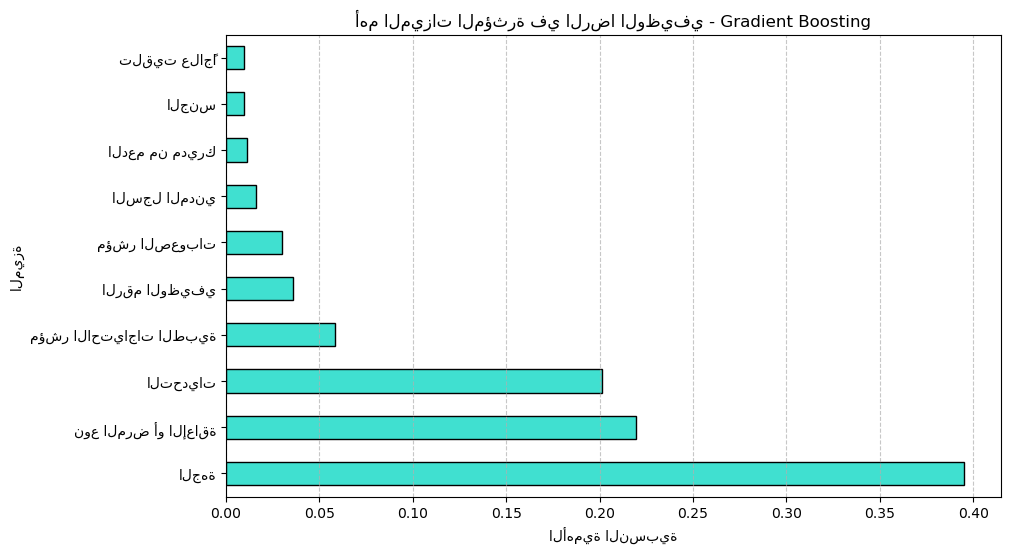

In [13]:
final_model = models[best_model]
if hasattr(final_model, 'feature_importances_'):
    print("\nتحليل أهمية الميزات...")
    feature_importances = pd.Series(final_model.feature_importances_, index=df.drop(columns=[target_column]).columns)
    plt.figure(figsize=(10, 6))
    feature_importances.nlargest(10).plot(kind='barh', color='turquoise', edgecolor='black')
    plt.title(f"أهم الميزات المؤثرة في الرضا الوظيفي - {best_model}")
    plt.xlabel("الأهمية النسبية")
    plt.ylabel("الميزة")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

أن الميزة الأكثر تأثيرًا على نتائج النموذج هي "الجهة" والتي تقترب من أهمية 0.40

المزايا الأخرى المهمة
هناك ميزات أخرى لها تأثير متوسط، مثل "نوع المرض أو الاعاقة" و"التحديات

المزايا الأقل أهمية
بعض المتغيرات مثل العلاج والدعم من المدير لها تأثير ضئيل جدًا على النموذج
هذا يعني أن هذه المتغيرات قد لا تكون عوامل حاسمة في التنبؤ بمستوى الرضا الوظيفي

## رسم مخطط توزيع لمؤشر الرضا الوظيفي (Histogram) 

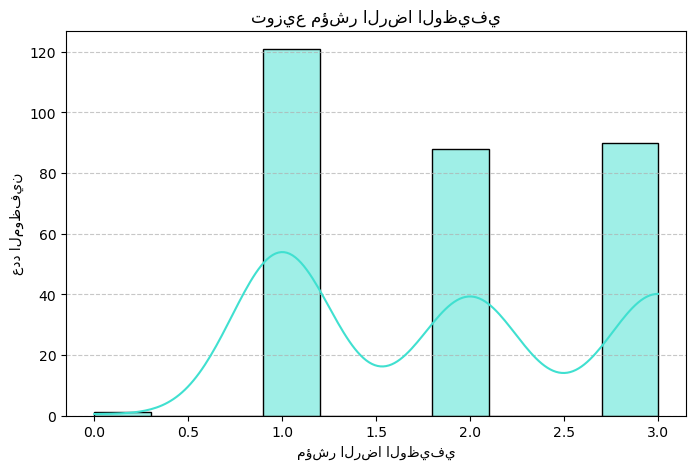

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df[target_column], bins=10, kde=True, color='turquoise')
plt.title("توزيع مؤشر الرضا الوظيفي")
plt.xlabel("مؤشر الرضا الوظيفي")
plt.ylabel("عدد الموظفين")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

التوزيع ليس متساويًا
الفئة 1 هي الأكثر شيوعًا، حيث تحتوي على أكبر عدد من الموظفين
الفئتان 2 و 3 لديهما عدد متوسط من الحالات
الفئة 0 شبه معدومة أو منخفضة جدًا

وجود تباين واضح في التوزيع
هذا يشير إلى أن معظم الموظفين لديهم رضا وظيفي متوسط إلى مرتفع

مؤشر الكثافة Kernel Density Estimation (KDE)
يظهر أن هناك قممًا بارزة عند الفئات 1 و 2 و3 

أغلب الموظفين لديهم رضا وظيفي مقبول إلى مرتفع (1، 2، 3)
قلة عدد الموظفين غير الراضين (0) قد تعني وجود عوامل مؤثرة إيجابية مثل الدعم الإداري أو البيئة الجيدة
لكن، قد يكون هناك تحيز في البيانات إذا لم يتم جمع بيانات كافية عن الموظفين غير الراضين

##  (Boxplot) لتحليل العلاقة بين مستوى الدعم من المدير و مؤشر الرضا الوظيفي رسم مخطط الصندوق

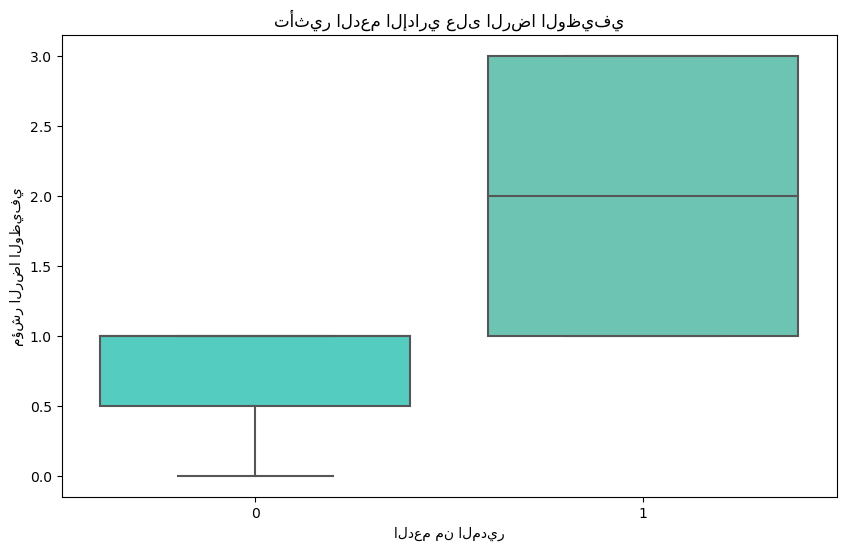

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='الدعم من مديرك', y=target_column, palette=['#40E0D0', '#5FD3BC', '#7EC6A7', '#9EB992'])
plt.title("تأثير الدعم الإداري على الرضا الوظيفي")
plt.xlabel("الدعم من المدير")
plt.ylabel("مؤشر الرضا الوظيفي")
plt.show()

الموظفون الذين لم يتلقوا دعمًا من المدير (القيمة 0)
لديهم رضا وظيفي أقل، حيث أن معظم البيانات تتركز عند القيم الأدنى
يتراوح مؤشر الرضا الوظيفي بين 0 و1 تقريبًا
يوجد تفاوت بسيط داخل هذه المجموعة، ولكن الحد الأعلى للرضا لا يتجاوز2 

الموظفون الذين تلقوا دعمًا من المدير (القيمة 1)
لديهم رضا وظيفي أعلى، حيث أن المتوسط المركزي أعلى بكثير
تتراوح القيم بين 1 و3، مما يدل على أن هؤلاء الموظفين أكثر رضا
يوجد تفاوت أكبر، ولكن الحد الأدنى للرضا في هذه الفئة أعلى من الفئة السابقة

## violinplot  تحليل توزيع مؤشر الرضا الوظيفي وفقًا لمستوى الدعم الإداري لرسم

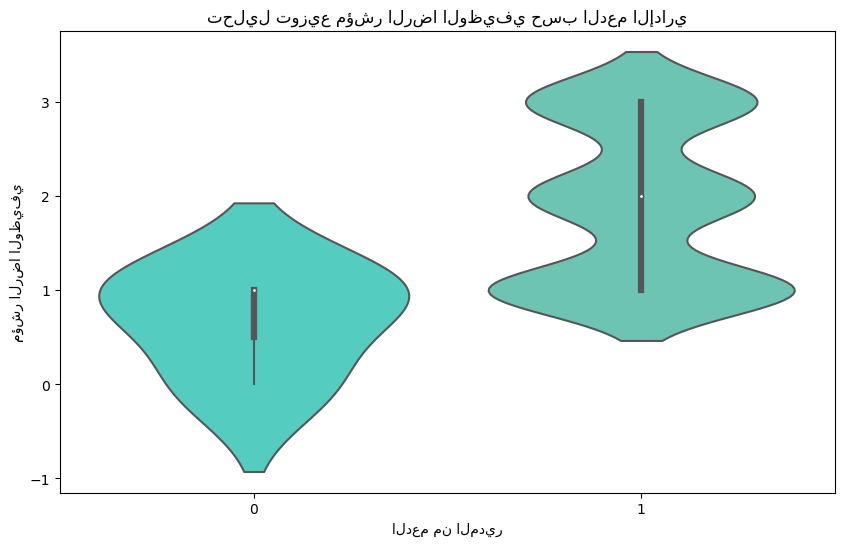

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='الدعم من مديرك', y=target_column, palette=['#40E0D0', '#5FD3BC', '#7EC6A7', '#9EB992'])
plt.title("تحليل توزيع مؤشر الرضا الوظيفي حسب الدعم الإداري")
plt.xlabel("الدعم من المدير")
plt.ylabel("مؤشر الرضا الوظيفي")
plt.show()

ظهر هذا الرسم (Violin Plot) توزيع مؤشر الرضا الوظيفي لمجموعتين من الموظفين
الموظفون الذين لم يتلقوا دعمًا إداريًا (0)
الموظفون الذين تلقوا دعمًا إداريًا(1) 

الموظفون الذين لم يتلقوا دعمًا إداريًا (0)
توزيع الرضا الوظيفي لديهم متمركز في القيم المنخفضة
معظم القيم تقع بين 0 و1.5، مع قلة في الفئات الأعلى
يشير ذلك إلى أن الرضا الوظيفي أقل بكثير عندما لا يكون هناك دعم إداري

الموظفون الذين تلقوا دعمًا إداريًا (1)
التوزيع أعرض وأكثر تنوعًا، مما يعني تفاوتًا في مستويات الرضا
يتواجد عدد كبير من الموظفين في القيم 2 و3، مما يشير إلى رضا وظيفي مرتفع في هذه المجموعة
هناك تفاوت في التوزيع، مما يعني أن بعض الموظفين لا يزال لديهم مستويات أقل من الرضا رغم حصولهم على دعم

##  (Scatter Plots) إنشاء مخططات ارتباط بين جميع الميزات في مجموعة البيانات

C:\Users\DELL-TS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

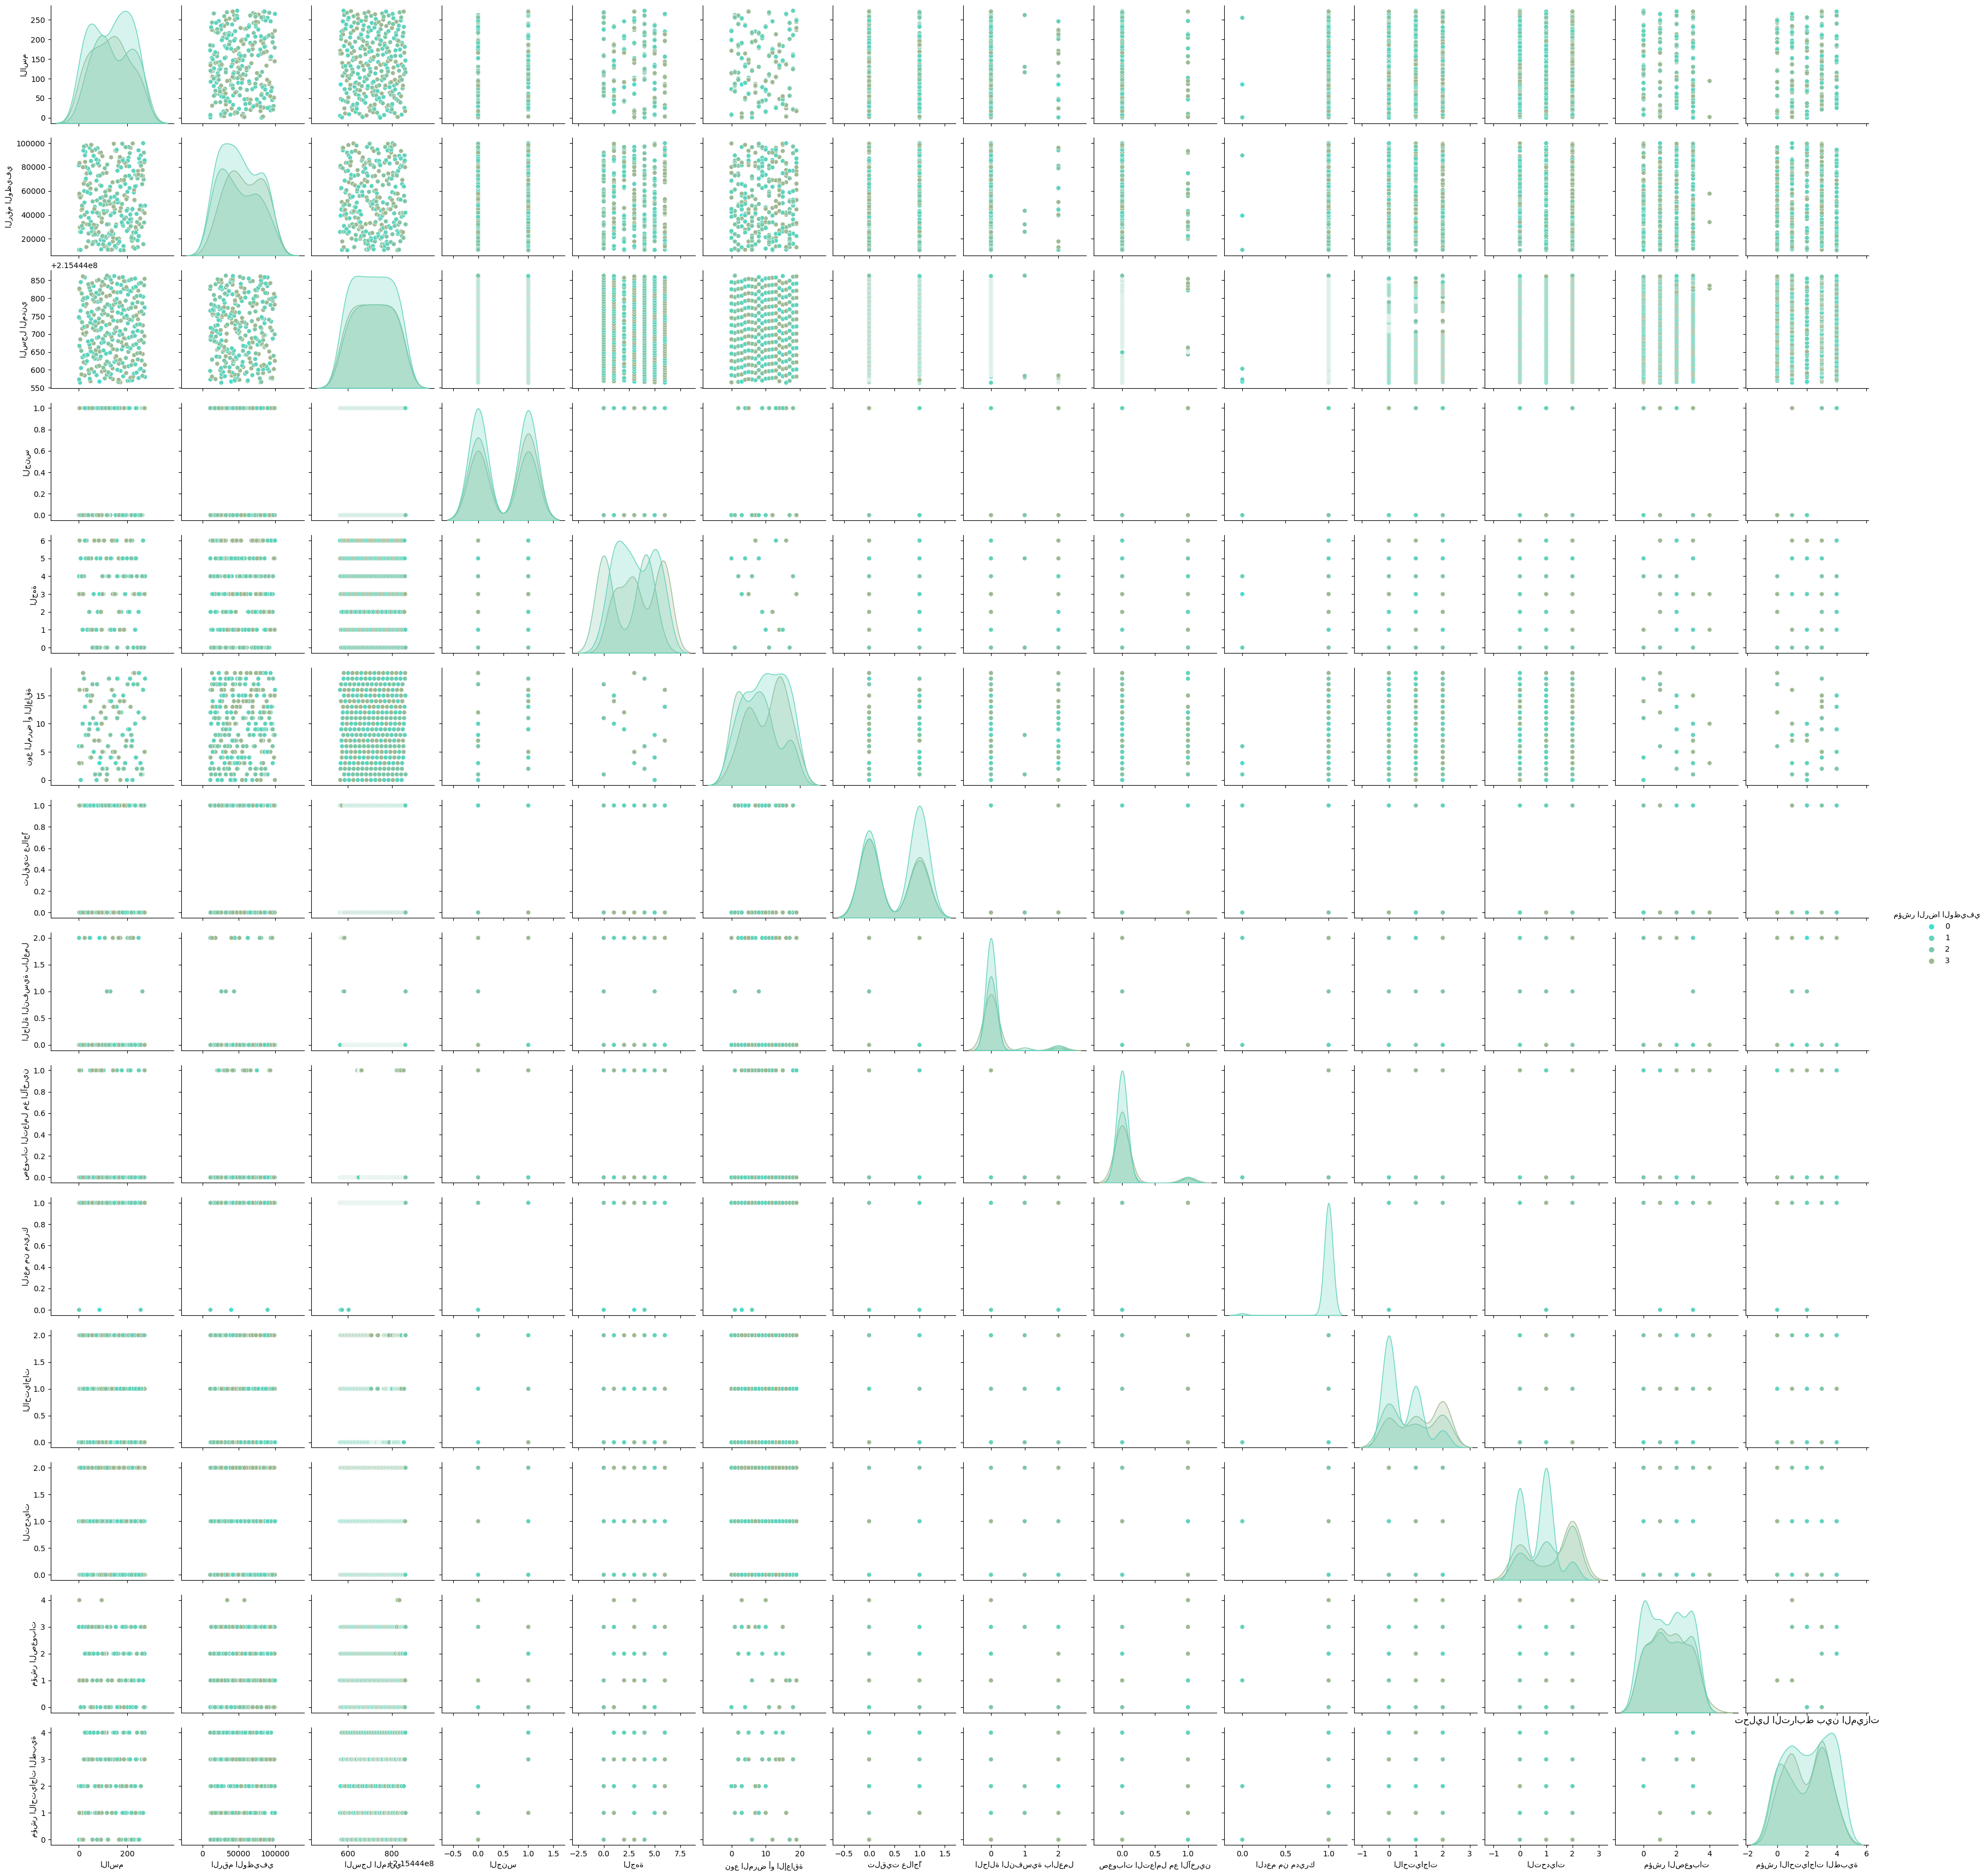

In [17]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue=target_column, palette=['#40E0D0', '#5FD3BC', '#7EC6A7', '#9EB992'])
plt.title("تحليل الترابط بين الميزات")
plt.show()

تحليل التوزيعات الفردية
القطر الرئيسي للمخطط يحتوي على مخططات الكثافة لكل متغير
يمكن ملاحظة أن بعض المتغيرات لديها توزيع غير متجانس، مما قد يشير إلى وجود بعض القيم المتطرفة أو التحيز في البيانات

تحليل العلاقات الثنائية بين المتغيرات
بعض الأزواج تُظهر أنماطًا خطية أو غير خطية، مما قد يشير إلى وجود ارتباط بين هذه المتغيرات
يمكن ملاحظة وجود عناقيد في بعض المناطق (Clusters)، مما قد يشير إلى وجود مجموعات مختلفة من الموظفين بناءً على ظروفهم 

✅ المخطط يساعد في تحديد المتغيرات المؤثرة
يمكننا تحديد أكثر المتغيرات ارتباطًا بمؤشر الرضا الوظيفي، مما يساعد في تحسين النماذج التنبؤية
إذا كانت بعض المتغيرات غير مؤثرة بشكل واضح، فيمكن استبعادها من التحليل لتبسيط النموذج

❌ قد تكون هناك متغيرات متداخلة (Multicollinearity)
إذا كان هناك ارتباط قوي بين متغيرين مستقلين، فقد يؤدي ذلك إلى مشاكل في النماذج الإحصائية
يمكن استخدام مصفوفة الارتباط (Correlation Matrix) للتحقق من ذلك


##  (Correlation Matrix)  رسم مصفوفة الارتباط بين الميزات المختلفة في البيانات

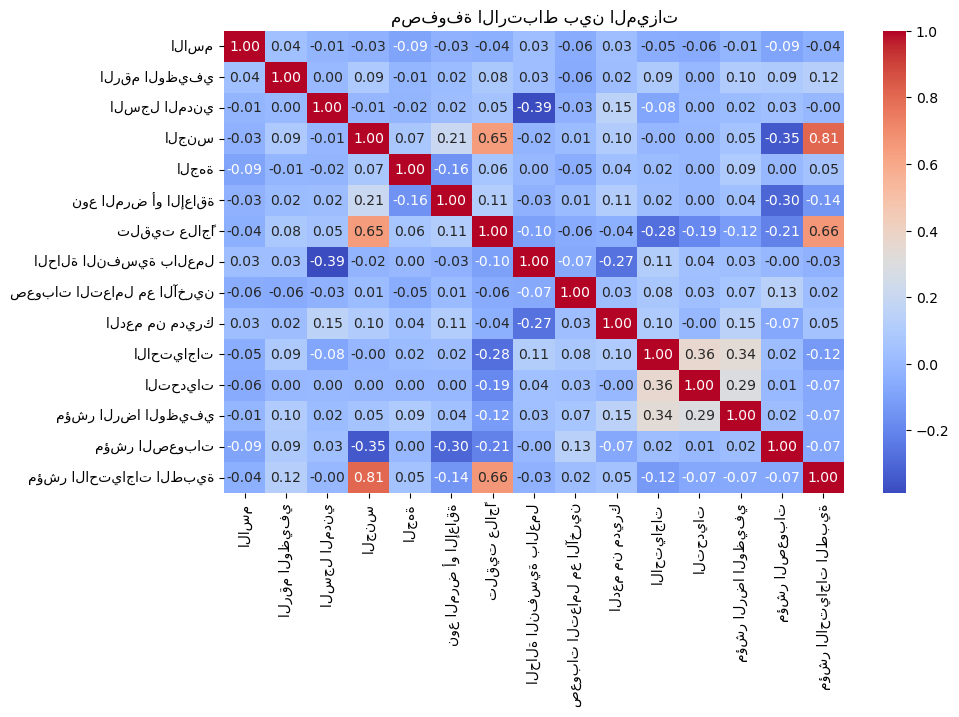

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("مصفوفة الارتباط بين الميزات")
plt.show()

الارتباط القوي بين بعض المتغيرات
تلقي العلاج و مؤشر الاحتياجات الطبية (قيمة = 0.66)
 يشير إلى أن الأشخاص الذين يحتاجون إلى علاج لديهم احتياجات طبية أعلى، مما يؤكد أهمية تحسين الدعم الطبي

الحالة النفسية في العمل ومؤشر الصعوبات (قيمة = 0.34)
 الموظفون الذين يعانون من صعوبات في العمل لديهم غالبًا حالة نفسية أسوأ

الارتباط الضعيف بين الدعم من المدير ومؤشر الرضا الوظيفي
الدعم من المدير والرضا الوظيفي (قيمة = 0.14)
 يشير إلى وجود تأثير إيجابي، لكنه ليس العامل الوحيد في تحديد مستوى الرضا الوظيفي
قد يكون هناك عوامل أخرى مثل الصعوبات في التعامل أو الاحتياجات الطبية تؤثر على الرضا أكثر

ارتباط منخفض بين الصعوبات والرضا الوظيفي
الصعوبات في التعامل ومؤشر الرضا الوظيفي (قيمة = 0.09)
 العلاقة ضعيفة جدًا، مما يعني أن الموظفين قادرون على التأقلم مع الصعوبات طالما توفرت لهم بيئة داعمة
    
 ✅ المتغيرات الأكثر تأثيرًا
الاحتياجات الطبية وتلقي العلاج لهما أكبر تأثير على الحالة العامة للموظف، لذا يجب تحسين الرعاية الصحية للموظفين
الحالة النفسية والصعوبات الوظيفية مرتبطة بشكل معتدل، مما يشير إلى أن تحسين بيئة العمل يمكن أن يرفع من مستوى رضا الموظفين

❌ المتغيرات الأقل تأثيرًا:
الدعم من المدير لا يبدو أنه العامل الأكثر تأثيرًا، مما يعني أن هناك حاجة إلى تحليل عوامل إضافية تؤثر على الرضا
الصعوبات في التعامل لا تؤثر بشدة على الرضا، مما يشير إلى أن الموظفين قادرون على التأقلم مع تحديات العمل طالما حصلوا على دعم آخر


## إجراء تحليل انحدار خطي لمعرفة كيف تؤثر العوامل "الدعم من المدير" و "مؤشر الصعوبات" على مؤشر الرضا الوظيفي 

In [20]:
import statsmodels.api as sm
X = df[['الدعم من مديرك', 'مؤشر الصعوبات']]
y = df['مؤشر الرضا الوظيفي']
X = sm.add_constant(X)  # إضافة الثابت
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     مؤشر الرضا الوظيفي   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3.412
Date:                Tue, 18 Feb 2025   Prob (F-statistic):             0.0343
Time:                        02:52:58   Log-Likelihood:                -369.75
No. Observations:                 300   AIC:                             745.5
Df Residuals:                     297   BIC:                             756.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6119      0.492      1.

يهدف هذا النموذج إلى تحليل تأثير الدعم من المدير ومؤشر الصعوبات على مؤشر الرضا الوظيفي

الملاحظات الرئيسية من التحليل
قوة النموذج (R-squared = 0.022)
يوضح أن 2.2% فقط من التغير في الرضا الوظيفي يمكن تفسيره من خلال الدعم من المدير والصعوبات
هذا يدل على أن هناك عوامل أخرى أكثر أهمية تؤثر على الرضا الوظيفي والتي لم يتم تضمينها في النموذج

تأثير الدعم من المدير على الرضا الوظيفي
المعامل (coef) = 1.255: يشير إلى أنه عندما يزيد الدعم من المدير بوحدة واحدة، يزيد الرضا الوظيفي بمقدار 1.255 نقطة في المتوسط
القيمة الاحتمالية (P-value) = 0.010: أقل من 0.05، مما يعني أن هذا التأثير إحصائيًا مهم

تأثير مؤشر الصعوبات على الرضا الوظيفي
المعامل (coef) = 0.0235: تأثير ضعيف جدًا، أي أن زيادة الصعوبات لا تؤثر بشكل ملحوظ على الرضا الوظيفي
القيمة الاحتمالية (P-value) = 0.580: أكبر من 0.05، مما يعني أن هذا التأثير غير مهم إحصائيًا
مستوى الدلالة الإحصائية (F-statistic = 3.412, Prob = 0.0343)
يشير إلى أن النموذج بأكمله له دلالة إحصائية عند مستوى 95%، لكنه ضعيف جدًا في التفسير

✅ ما الذي يمكن استنتاجه؟
الدعم من المدير له تأثير إيجابي على الرضا الوظيفي، لكنه ليس العامل الوحيد، فالنموذج لا يفسر سوى نسبة صغيرة جدًا من التغيرات
مؤشر الصعوبات ليس له تأثير واضح على الرضا الوظيفي، مما يدل على أن الموظفين قد يكونون قادرين على التعامل مع الصعوبات بطريقة مستقلة

❌ ما الذي يمكن تحسينه؟
إضافة المزيد من المتغيرات مثل
الاحتياجات الطبية
بيئة العمل
التحديات المهنية
الدخل أو المكافآت


## إجراء تحليل انحدار خطي لمعرفة كيف تؤثر العوامل على مؤشر الرضا الوظيفي

In [21]:
X = df[['الدعم من مديرك', 'مؤشر الصعوبات', 'الاحتياجات', 'الحالة النفسية بالعمل']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     مؤشر الرضا الوظيفي   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     10.73
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           3.90e-08
Time:                        02:53:11   Log-Likelihood:                -352.77
No. Observations:                 300   AIC:                             715.5
Df Residuals:                     295   BIC:                             734.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.54

In [ ]:
هذا النموذج يضيف الاحتياجات والحالة النفسية بالعمل إلى المتغيرات السابقة (الدعم من المدير ومؤشر الصعوبات) لمعرفة مدى تأثيرها على مؤشر الرضا الوظيفي

تحسن دقة النموذج بشكل طفيف:

R-squared = 0.127: الآن يفسر 12.7% من التغير في الرضا الوظيفي، وهو تحسن عن النموذج السابق (2.2%)، ولكنه لا يزال ضعيفًا
Adjusted R-squared = 0.115: يشير إلى أن المتغيرات المضافة حسنت النموذج بشكل بسيط ولكنه لا يزال بحاجة إلى تحسين

المتغيرات الأكثر تأثيرًا على الرضا الوظيفي
الاحتياجات (coef = 0.325, P-value = 0.000)
 له أقوى تأثير إحصائي في هذا النموذج، حيث أن زيادة الاحتياجات بوحدة واحدة تؤدي إلى زيادة الرضا الوظيفي بمقدار 0.325 نقطة
 القيم الاحتمالية (P-value = 0.000) تشير إلى أن التأثير مهم جدًا
الدعم من المدير (coef = 1.054, P-value = 0.029)
 لا يزال له تأثير إيجابي ولكنه أقل مقارنة بالنموذج السابق
 القيم الاحتمالية (P-value = 0.029) تشير إلى أن التأثير إحصائيًا مهم

المتغيرات غير المؤثرة بشكل كبير
مؤشر الصعوبات (coef = 0.0177, P-value = 0.661)
 تأثيره ضعيف جدًا على الرضا الوظيفي، والقيمة الاحتمالية (P > 0.05) تجعله غير مؤثر إحصائيًا

الحالة النفسية بالعمل (coef = 0.0571, P-value = 0.586)
 لم يكن لها تأثير قوي على الرضا الوظيفي، مما يشير إلى أن الموظفين قد يكونون راضين حتى لو كانت حالتهم النفسية ليست مثالية
    
 ✅ ما يؤثر بشكل كبير على الرضا الوظيفي

الاحتياجات (الأقوى تأثيرًا)
يجب تحسين الاستجابة لاحتياجات الموظفين، مثل التجهيزات الطبية، وسائل المساعدة، أو بيئة العمل المهيئة
الدعم من المدير
لا يزال يلعب دورًا مهمًا ولكنه ليس العامل الأساسي، مما يعني أن الدعم وحده غير كافٍ لتعزيز الرضا الوظيفي
 
❌ ما ليس له تأثير كبير 
مؤشر الصعوبات: لا يبدو أنه يؤثر بشكل مباشر على الرضا
الحالة النفسية بالعمل: رغم أهميته المنطقية، إلا أنه ليس له تأثير واضح على الرضا في هذا النموذج






## حفظ البيانات بعد المعالجة


In [ ]:
cleaned_file_path = "DID_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"تم حفظ البيانات بعد المعالجة في: {cleaned_file_path}")

## النتائج  بناءً على تحليل البيانات

العوامل الأكثر تأثيرًا على الرضا الوظيفي
✅ الاحتياجات لها التأثير الأكبر
أظهرت نتائج التحليل أن تلبية احتياجات الموظفين (مثل الأجهزة الطبية، الدعم الصحي، والتجهيزات) مرتبطة بشكل مباشر بتحسين الرضا الوظيفي
كلما زادت تلبية الاحتياجات، زاد مستوى الرضا الوظيفي

✅ الدعم من المدير له تأثير إيجابي ولكن محدود
الموظفون الذين يتلقون دعمًا إداريًا جيدًا لديهم مستويات أعلى من الرضا
لكن التأثير ليس كبيرًا جدًا، مما يعني أن هناك عوامل أخرى أكثر أهمية تؤثر على الرضا

العوامل التي لم يكن لها تأثير كبير
❌ الصعوبات لم تؤثر بشكل واضح على الرضا الوظيفي
أظهرت التحليلات أن وجود صعوبات في التعامل أو تحديات العمل لا يؤثر كثيرًا على رضا الموظفين
الموظفون قد يكونون قادرين على التكيف مع الصعوبات طالما يتم تلبية احتياجاتهم

❌ الحالة النفسية في العمل لم تكن عاملاً حاسمًا
لم يكن هناك ارتباط واضح بين الصحة النفسية والرضا الوظيفي، مما قد يشير إلى أن العوامل المادية والبيئية أكثر أهمية في تحديد رضا الموظفين

## التوصيات بناءً على تحليل البيانات  

تحسين تلبية احتياجات الموظفين
الاحتياجات كانت العامل الأكثر تأثيرًا، لذا يجب تحسين توفير
الأجهزة الطبية والتقنيات المساندة لموظفي ذوي الإعاقة أو الأمراض المستعصية
البيئة المناسبة في مكان العمل مثل إمكانية الوصول والمرافق الصحية
خطط دعم طبي وتأهيلي مستدامة لتلبية احتياجات الموظفين

تعزيز دور الدعم الإداري
رغم أن الدعم من المدير كان مؤثرًا، إلا أنه لم يكن العامل الأساسي، لذا يجب
تدريب المديرين على دعم الموظفين بطريقة أكثر فاعلية
إنشاء سياسات واضحة للدعم الإداري بحيث يكون أكثر تأثيرًا في تحسين بيئة العمل
إجراء تقييم دوري لمستوى الدعم الإداري وتأثيره على الموظفين

تطبيق حلول مستدامة لتحسين بيئة العمل
استنادًا إلى النتائج، يمكن تحسين بيئة العمل عبر
إطلاق برامج دعم نفسي واجتماعي للموظفين لضمان تحسين الحالة العامة لهم
توفير استبيانات دورية للموظفين لجمع ملاحظاتهم حول احتياجاتهم والتحديات التي يواجهونها
تحليل البيانات بشكل مستمر لمعرفة أي تغييرات في احتياجات الموظفين والرضا الوظيفي